0.4851536178189002
0.35476014154260693
0.4516215787388349
0.785439805920834


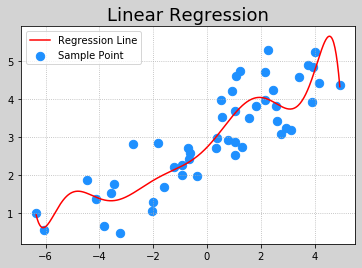

In [22]:
#多项式回归  多用在线性回归精度达不到的情况
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

x,y=np.loadtxt('../ml_data/single.txt',delimiter=',',unpack=True)
x=x.reshape(-1,1)
mp.figure('Linear Regression',facecolor='lightgray')
mp.title('Linear Regression',fontsize=18)
mp.grid(linestyle=':')
mp.scatter(x,y,s=70,color='dodgerblue',label='Sample Point')

#PolynomialFeatures多项式回归    
#sp.PolynomialFeatures多项式特征扩展器   注意：Python区分大小写
#结合图像，拟合方程的阶数，避免高阶过高过拟合
model=pl.make_pipeline(sp.PolynomialFeatures(9),lm.LinearRegression())
model.fit(x,y)
pred_y=model.predict(x)

#评估当前模型效果    metrics度量、指标
import sklearn.metrics as sm
print(sm.mean_absolute_error(y,pred_y))
print(sm.mean_squared_error(y,pred_y))
print(sm.median_absolute_error(y,pred_y))
print(sm.r2_score(y,pred_y))

#绘制多项式函数图像，从min到max拆500个点
#预测500个函数值，按顺序连线
x=np.linspace(x.min(),x.max(),500)
pred_y=model.predict(x.reshape(-1,1))
mp.plot(x,pred_y,color='red',label='Regression Line')

mp.legend()
mp.show()

过于简单的模型，无论对于训练数据还是测试数据都无法给出足够高的预测精度，这种现象叫做欠拟合；
过于复杂的模型，对于训练数据可以得到较高的预测精度，但对于测试数据通常精度较低，这种现象叫做过拟合；
一个性能可以结束的学习模型应该对训练数据和测试数据都有接近的预测精度，而且精度不能太低。